In [65]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns
from utilities import deets
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
df = (
    pd.read_csv('../../not_on_git/final_classification/all_classified.csv')
    .set_index('name')
    .query('prob>.9999')
    )
df

,significance,var_flag,streak_src_flag,pileup_flag,ra,dec,missing,sat_src_flag,extent_flag,conf_flag,...,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2,0p3_8_csc,24_microns_(MIPS)
name,,,,,,,,,,,,,,,,,,,,,
2CXO J012125.0-725827,10.584334,0,0,0,20.354232,-72.974249,0.389831,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3.250784,3.518963,5.990373,NaN,NaN
2CXO J143022.6+311158,5.257143,0,0,0,217.594350,31.199564,0.338983,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.159988,NaN,NaN
2CXO J143521.3+305719,2.722222,0,0,0,218.838875,30.955351,0.372881,0,0,0,...,NaN,4.965573,NaN,8.879777,NaN,NaN,NaN,7.183212,NaN,NaN
2CXO J143541.0+305954,2.166667,0,0,0,218.921038,30.998396,0.423729,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.692142,NaN,NaN
2CXO J164748.4-454409,2.888889,0,0,0,251.951747,-45.736101,0.542373,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3.058110,3.568559,5.782207,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J005214.7+473701,32.844842,1,0,0,13.061293,47.617120,0.322034,0,0,0,...,1.600025,NaN,1.680749,NaN,9.828926,3.021473,NaN,NaN,0.066774,0.002154
2CXO J094732.5+071827,3.230769,1,0,0,146.885695,7.307509,0.372881,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002615,NaN
2CXO J094741.9+073307,13.728778,1,0,0,146.924694,7.551989,0.237288,0,0,0,...,NaN,3.889395,NaN,4.866196,NaN,NaN,NaN,6.208020,0.027493,NaN


In [67]:
deets(df,1)

_____________________________________________________
------------------------------
Number of Objects : 14066
Number of Columns : 64
------------------------------


AGN     8574
STAR    5166
YSO      208
LMXB      71
HMXB      46
CV         1
Name: class, dtype: int64

_____________________________________________________


In [80]:
from utilities import get_true_data
df = df[df['significance']>3]
df_agn = df[df['class']=='HMXB'].sort_values(by = 'prob' , ascending=False)
df_agn = df_agn[:101]
df_agn =  get_true_data(df_agn[['significance', 'ra', 'dec' , 'class' , 'prob' , 'prob_AGN' , 'prob_STAR','prob_YSO','prob_HMXB','prob_LMXB','prob_ULX','prob_CV', 'prob_PULSAR']])
df_agn = df_agn[[
    'prob', 'class', 'ra', 'dec', 'var_flag','significance','prob_AGN', 'prob_STAR', 'prob_YSO', 'prob_HMXB', 'prob_LMXB', 'prob_ULX', 'prob_CV',
    'b-csc', 'h-csc', 'm-csc', 's-csc', 'u-csc', 'hard_hm', 'hard_hs', 'hard_ms', 'b-mag', 'm-mag', 's-mag', 'h-mag', 'u-mag', 'h-m', 'h-s', 'm-s', 'fx/fo',
    'var_intra_index_b', 'var_intra_prob_b', 'ks_intra_prob_b', 'kp_intra_prob_b', 'var_inter_index_b', 'var_inter_prob_b', 'var_inter_sigma_b', 
    'umag', 'gmag', 'rmag', 'imag', 'zmag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'W3mag', 'W4mag', 
    'fuv_mag', 'nuv_mag', 'g_mag', 'bp_mag', 'rp_mag', 'bp-R', 'g-J', 'g-W2', 'bp-H', 'bp-W3', 'rp-K', 
    'J-H', 'J-W1', 'W1-W2', 'u-g', 'g-r', 'r-z', 'i-z', 'u-z', 

]]
display(df_agn)


,prob,class,ra,dec,var_flag,significance,prob_AGN,prob_STAR,prob_YSO,prob_HMXB,...,bp-W3,rp-K,J-H,J-W1,W1-W2,u-g,g-r,r-z,i-z,u-z
name,,,,,,,,,,,,,,,,,,,,,
2CXO J140257.3+541752,0.999994,HMXB,210.739132,54.298014,1,5.738382,0.000004,1.311255e-06,4.954589e-08,0.999994,...,NaN,NaN,NaN,NaN,0.399,NaN,NaN,NaN,NaN,NaN
2CXO J140300.5+542002,0.999994,HMXB,210.752100,54.333965,1,4.787879,0.000002,2.293272e-06,4.175924e-08,0.999994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J140326.6+542220,0.999993,HMXB,210.861179,54.372454,1,3.945946,0.000003,1.086618e-06,3.948019e-08,0.999993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J140310.7+542126,0.999987,HMXB,210.794701,54.357306,1,4.685714,0.000004,3.807203e-06,5.016072e-08,0.999987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J140415.7+542257,0.999985,HMXB,211.065827,54.382724,1,6.297478,0.000012,9.865339e-07,3.426305e-08,0.999985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J140412.9+541941,0.999985,HMXB,211.054138,54.328157,1,6.193548,0.000012,1.030621e-06,3.900623e-08,0.999985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J140231.4+542400,0.999983,HMXB,210.630851,54.400020,1,6.625145,0.000007,8.396395e-07,4.510104e-08,0.999983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J235719.3-344235,0.999980,HMXB,359.330808,-34.709867,1,3.894737,0.000013,1.431233e-06,7.200798e-07,0.999980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J140354.3+542209,0.999976,HMXB,210.976364,54.369369,1,3.736842,0.000008,6.102193e-06,1.009619e-07,0.999976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
from astropy.coordinates import SkyCoord
from astropy import units as u 
ra = df_agn['ra'][0]
dec = df_agn['dec'][0]
sk = SkyCoord(ra*u.degree , dec*u.degree , frame = 'icrs')
f'{}sk.ra.hms'

hms_tuple(h=14.0, m=2.0, s=57.391697164372886)

In [79]:

print(
    df_agn.reset_index()
    [['name' , 'ra','dec', 'significance' , 'var_flag' , 'var_inter_prob_b' ,'prob','class']]
    .replace(0 , np.nan)
    .to_latex(na_rep=' ', longtable=True, index=False , column_format='lccccccr' , caption='HMXB' , header = ['Name' , 'RA(J2000)','DEC(J2000)','significance','Variable flag','var prob','predicted class' , 'CMP'])
)

\begin{longtable}{lccccccr}
\caption{HMXB}\\
\toprule
                  Name &   RA(J2000) & DEC(J2000) & significance & Variable flag &  var prob & predicted class &   CMP \\
\midrule
\endhead
\midrule
\multicolumn{8}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
 2CXO J140257.3+541752 &  210.739132 &  54.298014 &     5.738382 &             1 &  0.997361 &        0.999994 &  HMXB \\
 2CXO J140300.5+542002 &  210.752100 &  54.333965 &     4.787879 &             1 &  0.984460 &        0.999994 &  HMXB \\
 2CXO J140326.6+542220 &  210.861179 &  54.372454 &     3.945946 &             1 &  0.939893 &        0.999993 &  HMXB \\
 2CXO J140310.7+542126 &  210.794701 &  54.357306 &     4.685714 &             1 &  0.813974 &        0.999987 &  HMXB \\
 2CXO J140415.7+542257 &  211.065827 &  54.382724 &     6.297478 &             1 &  0.803086 &        0.999985 &  HMXB \\
 2CXO J140412.9+541941 &  211.054138 &  54.328157 &     6.193548 &             1 &  0.695041 & 

In [45]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_agn.loc['2CXO J105259.7+573154'])

prob                    0.999991
class                        AGN
ra                       163.249
dec                      57.5318
var_flag                       0
significance               5.891
prob_AGN                0.999991
prob_STAR            4.54724e-06
prob_YSO             4.23613e-07
prob_HMXB            3.14381e-07
prob_LMXB            2.97808e-07
prob_ULX             6.24047e-07
prob_CV              1.79731e-06
b-csc                        NaN
h-csc                        NaN
m-csc                        NaN
s-csc                        NaN
u-csc                        NaN
hard_hm                      NaN
hard_hs                      NaN
hard_ms                      NaN
b-mag                        NaN
m-mag                        NaN
s-mag                        NaN
h-mag                        NaN
u-mag                        NaN
h-m                          NaN
h-s                          NaN
m-s                          NaN
fx/fo                        NaN
var_intra_

In [44]:
display(df_agn.loc['2CXO J105259.7+573154'])

prob        0.999991
class            AGN
ra           163.249
dec          57.5318
var_flag           0
              ...   
u-g            0.738
g-r            0.232
r-z            0.633
i-z            0.522
u-z            1.603
Name: 2CXO J105259.7+573154, Length: 68, dtype: object

In [26]:
from utilities import plot_feat_feat , get_true_data

In [89]:
true_df = get_true_data(df[['prob' , 'class']])
filters = ['b' , 'm' , 's' , 'h' , 'u']
# for f in filters:
#     true_df = true_df[true_df[f'{f}-csc']>0]
for f in filters:
    true_df[f'{f}-mag'] = [np.nan]*len(true_df)
    true_df.loc[true_df[f'{f}-csc']>0 , f'{f}-mag'] = -np.log10(true_df.loc[true_df[f'{f}-csc']>0][f'{f}-csc'])
true_df['h-m'] = true_df['h-mag'] - true_df['m-mag']
true_df['h-s'] = true_df['h-mag'] - true_df['s-mag']
true_df['m-s'] = true_df['m-mag'] - true_df['s-mag']

true_df['hard_hm'] = np.nan
true_df['hard_ms'] = np.nan
true_df['hard_hs'] = np.nan

true_df['hard_hm'] = (true_df['h-csc'] - true_df['m-csc']) / (true_df['h-csc'] + true_df['m-csc'])
true_df['hard_ms'] = (true_df['m-csc'] - true_df['s-csc']) / (true_df['m-csc'] + true_df['s-csc'])
true_df['hard_hs'] = (true_df['h-csc'] - true_df['s-csc']) / (true_df['h-csc'] + true_df['s-csc'])


true_df['fx/fo'] = true_df['b-mag'] - true_df['gmag']

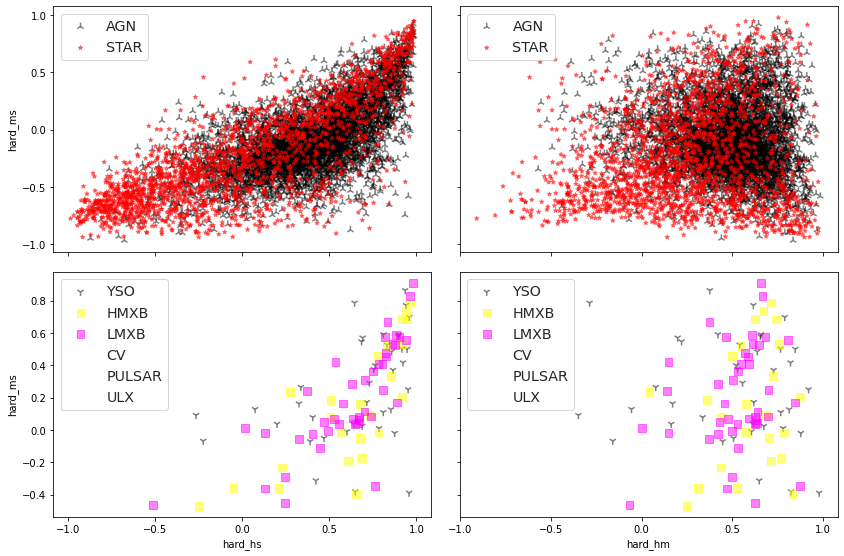

In [90]:
from utilities import plot_feat_feat
fig , ax =  plt.subplots(nrows = 2 , ncols=2 , figsize=(12,8) , sharey='row' , sharex='col')
ax = np.ravel(ax)
x1 = 'hard_hs'
x2 = 'hard_hm'
y = 'hard_ms'
plot_feat_feat(true_df, x1,y , ax=ax[0] , cl=['AGN' ,'STAR'])
plot_feat_feat(true_df, x2,y , ax=ax[1] , cl=['AGN' ,'STAR'])

plot_feat_feat(true_df, x1,y , ax=ax[2] , cl=['YSO' ,'HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])
plot_feat_feat(true_df, x2,y , ax=ax[3] , cl=['YSO' ,'HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])

for a in ax:
    a.legend()
ax[2].set_xlabel(x1)
ax[0].set_ylabel(y)
ax[2].set_ylabel(y)
ax[3].set_xlabel(x2)
#ax[0].set_xticklabels(rotation = 45, ha="right")
# plt.subplots_adjust(wspace=0.05, hspace=0 , bottom=0.2)
plt.tight_layout()
plt.legend()
#plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig(f'{img_loc}feat-1.jpg' , format='jpg')
plt.show()

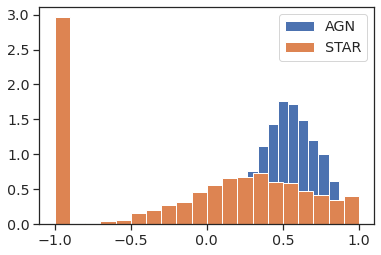

In [100]:
plt.hist(true_df[true_df['class']=='AGN']['hard_hm'] , label = 'AGN' , bins=30 , density=True)
plt.hist(true_df[true_df['class']=='STAR']['hard_hm'] , label='STAR' , bins=20 , density=True)
plt.legend()
plt.show()

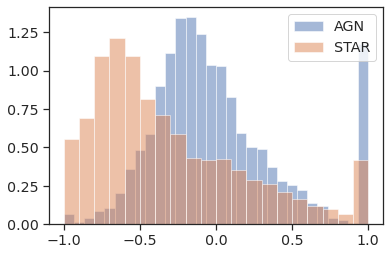

In [103]:
plt.hist(true_df[true_df['class']=='AGN']['hard_ms'] , label = 'AGN' , bins=30 , density=True , alpha=0.5)
plt.hist(true_df[true_df['class']=='STAR']['hard_ms'] , label='STAR' , bins=20 , density=True , alpha=0.5)
plt.legend()
plt.show()

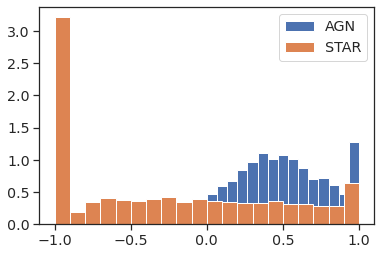

In [102]:
plt.hist(true_df[true_df['class']=='AGN']['hard_hs'] , label = 'AGN' , bins=30 , density=True)
plt.hist(true_df[true_df['class']=='STAR']['hard_hs'] , label='STAR' , bins=20 , density=True)
plt.legend()
plt.show()

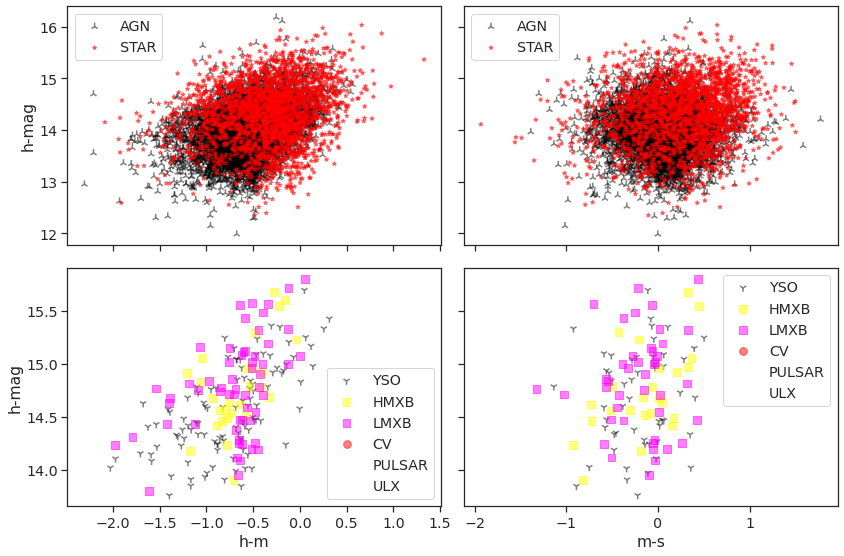

In [114]:
from utilities import plot_feat_feat
fig , ax =  plt.subplots(nrows = 2 , ncols=2 , figsize=(12,8) , sharey='row' , sharex='col')
ax = np.ravel(ax)
x1 = 'h-m'
x2 = 'm-s'
y = 'h-mag'
plot_feat_feat(true_df, x1,y , ax=ax[0] , cl=['AGN' ,'STAR'])
plot_feat_feat(true_df, x2,y , ax=ax[1] , cl=['AGN' ,'STAR'])

plot_feat_feat(true_df, x1,y , ax=ax[2] , cl=['YSO' ,'HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])
plot_feat_feat(true_df, x2,y , ax=ax[3] , cl=['YSO' ,'HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])

for a in ax:
    a.legend()
ax[2].set_xlabel(x1)
ax[0].set_ylabel(y)
ax[2].set_ylabel(y)
ax[3].set_xlabel(x2)
#ax[0].set_xticklabels(rotation = 45, ha="right")
# plt.subplots_adjust(wspace=0.05, hspace=0 , bottom=0.2)
plt.tight_layout()
plt.legend()
#plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig(f'{img_loc}feat-1.jpg' , format='jpg')
plt.show()

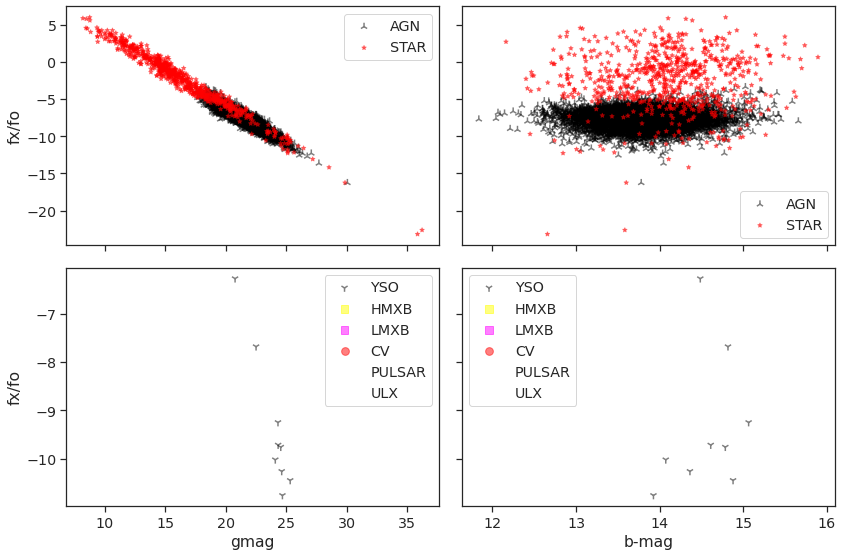

In [130]:
from utilities import plot_feat_feat
fig , ax =  plt.subplots(nrows = 2 , ncols=2 , figsize=(12,8) , sharey='row' , sharex='col')
ax = np.ravel(ax)
x1 = 'gmag'
x2 = 'b-mag'
y = 'fx/fo'
plot_feat_feat(true_df, x1,y , ax=ax[0] , cl=['AGN' ,'STAR'])
plot_feat_feat(true_df, x2,y , ax=ax[1] , cl=['AGN' ,'STAR'])

plot_feat_feat(true_df, x1,y , ax=ax[2] , cl=['YSO' ,'HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])
plot_feat_feat(true_df, x2,y , ax=ax[3] , cl=['YSO' ,'HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])

for a in ax:
    a.legend()
ax[2].set_xlabel(x1)
ax[0].set_ylabel(y)
ax[2].set_ylabel(y)
ax[3].set_xlabel(x2)
#ax[0].set_xticklabels(rotation = 45, ha="right")
# plt.subplots_adjust(wspace=0.05, hspace=0 , bottom=0.2)
plt.tight_layout()
plt.legend()
#plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig(f'{img_loc}feat-1.jpg' , format='jpg')
plt.show()

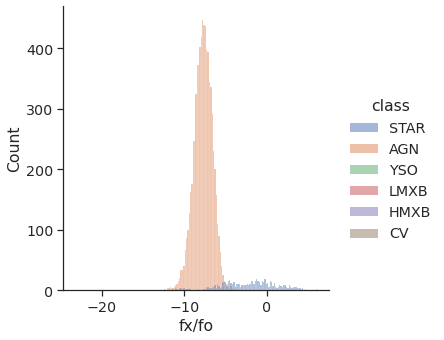

In [128]:
sns.displot(
    data = true_df,
    x = 'fx/fo' ,
    kind='hist' , 
    hue = 'class'
)
plt.show()

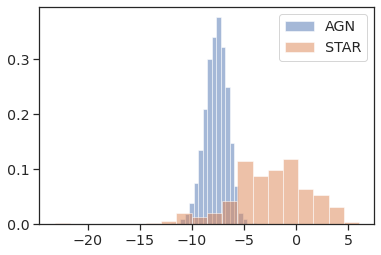

In [104]:
plt.hist(true_df[true_df['class']=='AGN']['fx/fo'] , label = 'AGN' , bins=30 , density=True , alpha=0.5)
plt.hist(true_df[true_df['class']=='STAR']['fx/fo'] , label='STAR' , bins=20 , density=True , alpha=0.5)
plt.legend()
plt.show()